In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import statsmodels.api as sm
from itertools import combinations
import collections
from matplotlib.lines import Line2D

In [2]:
pubs_author_funder = pd.read_csv("..//..//data//dropbox//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else "Not-Funded")
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [39]:
#select all publications authored by China and US
def assign(authorlist):
    label=0
    authorlist=list(set(authorlist))
    if len(authorlist)>1:
        if "Germany" in authorlist and 'China' in authorlist:
            label=1
    return label

In [40]:
pubs_author_funder['CU']=pubs_author_funder['author_country'].apply(lambda x:assign(x))
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,CU
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,0
2,30574691,[Russia],[Russia],83,2009,0.312,4,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,0


In [41]:
cu_df=pubs_author_funder[pubs_author_funder.CU==1]
cu_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,CU
48,30726322,"[Germany, China]","[China, China, China, China, China]",1,2009,0.942,16,1
419,30809896,"[Germany, China, Italy, Hungary, Slovenia]","[China, China, China, China, Hungary, Slovenia...",69,2009,0.511,14,1
465,30818345,"[Germany, China]","[Germany, Germany]",98,2009,0.753,15,1
502,30820590,"[China, Germany]","[China, China, China]",1,2009,0.942,16,1
1217,30884878,"[China, Germany]","[Germany, China]",89,2009,3.006,22,1


In [42]:
def assign2(funderlist):
    label='none'
    if "Germany" in funderlist and 'China' in funderlist:
        label='both'
    elif "Germany" in funderlist:
        label='China'
    elif 'China' in funderlist:
        label='US'
    return label
cu_df['fund']=cu_df['funder_country'].apply(lambda x:assign2(x))
cu_df.head()

<ipython-input-42-0c0d6c22f09d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_df['fund']=cu_df['funder_country'].apply(lambda x:assign2(x))


,id,author_country,funder_country,discipline,year,rel_citation,citation,CU,fund
48,30726322,"[Germany, China]","[China, China, China, China, China]",1,2009,0.942,16,1,US
419,30809896,"[Germany, China, Italy, Hungary, Slovenia]","[China, China, China, China, Hungary, Slovenia...",69,2009,0.511,14,1,US
465,30818345,"[Germany, China]","[Germany, Germany]",98,2009,0.753,15,1,China
502,30820590,"[China, Germany]","[China, China, China]",1,2009,0.942,16,1,US
1217,30884878,"[China, Germany]","[Germany, China]",89,2009,3.006,22,1,both


In [43]:
cnt_df = cu_df.groupby(['year','fund']).size().reset_index(name='count')
cnt_df.head()

,year,fund,count
0,2009,China,302
1,2009,US,652
2,2009,both,441
3,2009,none,762
4,2010,China,361


In [44]:
cnt_df=cnt_df.pivot(index='year',columns='fund',values='count')
cnt_df.head()

fund,China,US,both,none
year,,,,
2009,302,652,441,762
2010,361,820,641,704
2011,416,886,871,681
2012,489,1146,1073,708
2013,546,1372,1205,877


In [45]:
cnt_df = cnt_df.div(cnt_df.sum(axis=1), axis=0)
cnt_df

fund,China,US,both,none
year,,,,
2009,0.140009,0.302272,0.204451,0.353268
2010,0.142914,0.324624,0.253761,0.278702
2011,0.145760,0.310441,0.305186,0.238612
2012,0.143150,0.335480,0.314110,0.207260
2013,0.136500,0.343000,0.301250,0.219250
2014,0.131524,0.369520,0.270007,0.228949
2015,0.126784,0.372197,0.285161,0.215858
2016,0.141227,0.367675,0.256007,0.235091
2017,0.143860,0.391866,0.241946,0.222329


In [46]:
fund_size=pubs_author_funder[['id','funder_country','year','author_country']]
fund_size=fund_size[fund_size.funder_country!='Not-Funded']
fund_size['fund_size']=fund_size['funder_country'].apply(lambda x:'domestic' if len(set(x))==1 else 'international')
fund_size.head()

,id,funder_country,year,author_country,fund_size
0,30507292,[Turkey],2009,[Turkey],domestic
1,30574690,"[United States, United States, United States, ...",2009,"[United States, France]",domestic
2,30574691,[Russia],2009,[Russia],domestic
3,30585095,"[Spain, Spain, Spain, Spain, Spain, Spain]",2009,"[Spain, Spain]",domestic
4,30585097,[Spain],2009,"[Germany, Spain]",domestic


In [47]:
fund_size = fund_size.groupby(['year','fund_size']).size().reset_index()
fund_size = fund_size.rename(columns={0:'count'})

In [48]:
fund_size = fund_size.pivot(index="year",columns='fund_size',values='count')
fund_size = fund_size.div(fund_size.sum(axis=1), axis=0)
fund_size.head()

fund_size,domestic,international
year,,
2009,0.852925,0.147075
2010,0.833134,0.166866
2011,0.826110,0.173890
2012,0.827351,0.172649
2013,0.832491,0.167509


In [49]:
author_size=pubs_author_funder[['id','year','author_country']]
author_size['author_size']=author_size['author_country'].apply(lambda x:'domestic' if len(set(x))==1 else 'international')
author_size = author_size.groupby(['year','author_size']).size().reset_index()
author_size = author_size.rename(columns={0:'count'})
author_size = author_size.pivot(index="year",columns='author_size',values='count')
author_size = author_size.div(author_size.sum(axis=1), axis=0)
author_size.head()

<ipython-input-49-d23d30fad844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_size['author_size']=author_size['author_country'].apply(lambda x:'domestic' if len(set(x))==1 else 'international')


author_size,domestic,international
year,,
2009,0.788537,0.211463
2010,0.780102,0.219898
2011,0.774328,0.225672
2012,0.769506,0.230494
2013,0.761927,0.238073


In [51]:
fund_size['type']='fund'
fund_size=fund_size.reset_index()
author_size['type']='author'
author_size=author_size.reset_index()
author_size

author_size,year,domestic,international,type
0,2009,0.788537,0.211463,author
1,2010,0.780102,0.219898,author
2,2011,0.774328,0.225672,author
3,2012,0.769506,0.230494,author
4,2013,0.761927,0.238073,author
5,2014,0.754452,0.245548,author
6,2015,0.745715,0.254285,author
7,2016,0.730375,0.269625,author
8,2017,0.724326,0.275674,author
9,2018,0.720304,0.279696,author


In [54]:
metadata = pd.concat([author_size,fund_size])
metadata.head()

,year,domestic,international,type
0,2009,0.788537,0.211463,author
1,2010,0.780102,0.219898,author
2,2011,0.774328,0.225672,author
3,2012,0.769506,0.230494,author
4,2013,0.761927,0.238073,author


In [63]:
colors = ['red', 'blue']
styles=['-','--']
lines = [c+s for c in colors for s in styles]
lines

['red-', 'red--', 'blue-', 'blue--']

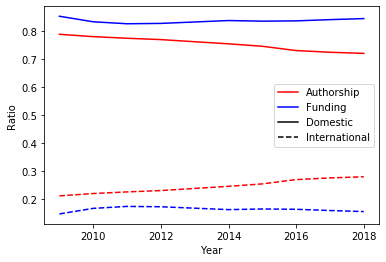

In [71]:
fig,ax=plt.subplots()
sns.lineplot(x='year',y='domestic',data=metadata[metadata.type=='author'],
             color='red',ax=ax,linestyle="-")
sns.lineplot(x='year',y='international',data=metadata[metadata.type=='author'],
             color='red',ax=ax,linestyle="--")
sns.lineplot(x='year',y='domestic',data=metadata[metadata.type=='fund'],
             color='blue',ax=ax,linestyle="-")
sns.lineplot(x='year',y='international',data=metadata[metadata.type=='fund'],
             color='blue',ax=ax,linestyle="--")
colors = ['red', 'blue']
styles=['-','--']
lines = [Line2D([0], [0], color=c, linestyle="-") for c in colors]
lines2 = [Line2D([0], [0], color='k',linestyle=s) for s in styles]
labels = ['Authorship','Funding','Domestic','International']
plt.legend(lines+lines2, labels)
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.savefig("Ratio_OverYear.png")

In [3]:
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [4]:
pubs_author_funder['coll']=pubs_author_funder['author_country'].apply(
    lambda x: 1 if len(set(x))>1 else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,coll
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [5]:
coll_df=pubs_author_funder[pubs_author_funder.coll==1]
coll_df.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,coll
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,1
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,1
14,30593088,"[France, Belgium, France]","[Russia, Russia]",89,2009,1.503,11,1


In [6]:
coll_df['author_country']=coll_df['author_country'].apply(lambda x:list(set(x)))
coll_df.head()

<ipython-input-6-940b802950c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coll_df['author_country']=coll_df['author_country'].apply(lambda x:list(set(x)))


,id,author_country,funder_country,discipline,year,rel_citation,citation,coll
1,30574690,"[France, United States]","[United States, United States, United States, ...",83,2009,0.703,9,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1
7,30585103,"[United Kingdom, Ireland]",[Ireland],89,2009,0.957,7,1
9,30585105,"[United States, Canada]",[Canada],89,2009,0.000,0,1
14,30593088,"[Belgium, France]","[Russia, Russia]",89,2009,1.503,11,1


In [7]:
coll_df=coll_df[['id','author_country','funder_country','rel_citation']]
coll_df=coll_df.explode('author_country')
coll_df.head()

,id,author_country,funder_country,rel_citation
1,30574690,France,"[United States, United States, United States, ...",0.703
1,30574690,United States,"[United States, United States, United States, ...",0.703
4,30585097,Germany,[Spain],0.410
4,30585097,Spain,[Spain],0.410
7,30585103,United Kingdom,[Ireland],0.957


In [8]:
coll_df

,id,author_country,funder_country,rel_citation
1,30574690,France,"[United States, United States, United States, ...",0.703
1,30574690,United States,"[United States, United States, United States, ...",0.703
4,30585097,Germany,[Spain],0.410
4,30585097,Spain,[Spain],0.410
7,30585103,United Kingdom,[Ireland],0.957
...,...,...,...,...
12759117,65300906,Denmark,Not-Funded,0.000
12759118,65300907,Finland,Not-Funded,0.000
12759118,65300907,China,Not-Funded,0.000
12759118,65300907,United States,Not-Funded,0.000


In [10]:
a=1
b=1
if a==1 and b==1:
    print('yes')

yes


In [9]:
def type(author,funder):
    type="null"
    if funder=='Not-Funded':
        type='Not-Funded'
    elif (author in funder) and (len(set(funder))==1):
        type='domestic'
    else:
        type='other'
    return type
coll_df['fund_type']=coll_df.apply(lambda x:type(x.author_country,x.funder_country), axis=1)
coll_df.head()

,id,author_country,funder_country,rel_citation,fund_type
1,30574690,France,"[United States, United States, United States, ...",0.703,other
1,30574690,United States,"[United States, United States, United States, ...",0.703,domestic
4,30585097,Germany,[Spain],0.410,other
4,30585097,Spain,[Spain],0.410,domestic
7,30585103,United Kingdom,[Ireland],0.957,other


In [10]:
cntry_cnt=coll_df.groupby('author_country').size().reset_index()
cntry_cnt=cntry_cnt.rename(columns={0:"pub_cnt"})
cntry_cnt.head()

,author_country,pub_cnt
0,Afghanistan,371
1,Albania,1017
2,Algeria,14867
3,Andorra,68
4,Angola,467


In [11]:
cntry_type = coll_df.groupby(['author_country','fund_type'])['rel_citation'].mean().reset_index()
cntry_type=cntry_type.fillna(0)
cntry_type.head()

,author_country,fund_type,rel_citation
0,Afghanistan,Not-Funded,1.629487
1,Afghanistan,domestic,0.000000
2,Afghanistan,other,4.793798
3,Albania,Not-Funded,0.737792
4,Albania,domestic,0.700556


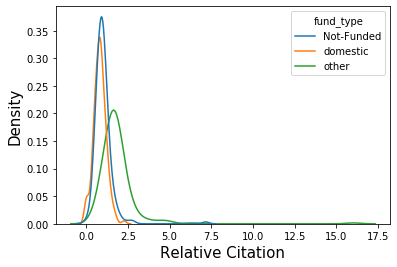

In [30]:
sns.kdeplot(x='rel_citation',data=cntry_type,hue='fund_type')
plt.xlabel("Relative Citation",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.savefig("fundtype_density.png")

In [12]:
top10 = cntry_cnt.sort_values(by='pub_cnt',ascending=False).head(10)['author_country'].values.tolist()
top10

['United States',
 'China',
 'United Kingdom',
 'Germany',
 'France',
 'Canada',
 'Italy',
 'Australia',
 'Spain',
 'Japan']

In [13]:
cntry_top10=cntry_type[cntry_type.author_country.isin(top10)]
cntry_top10['rank']=cntry_top10['author_country'].apply(lambda x:top10.index(x))
cntry_top10=cntry_top10.sort_values(by='rank')
cntry_top10

<ipython-input-13-9435884e822c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_top10['rank']=cntry_top10['author_country'].apply(lambda x:top10.index(x))


,author_country,fund_type,rel_citation,rank
557,United States,other,1.708003,0
555,United States,Not-Funded,1.263200,0
556,United States,domestic,1.679780,0
111,China,Not-Funded,1.160694,1
112,China,domestic,1.338767,1
113,China,other,1.785811,1
554,United Kingdom,other,1.875471,2
553,United Kingdom,domestic,1.508892,2
552,United Kingdom,Not-Funded,1.362756,2
198,Germany,domestic,1.282689,3


No handles with labels found to put in legend.


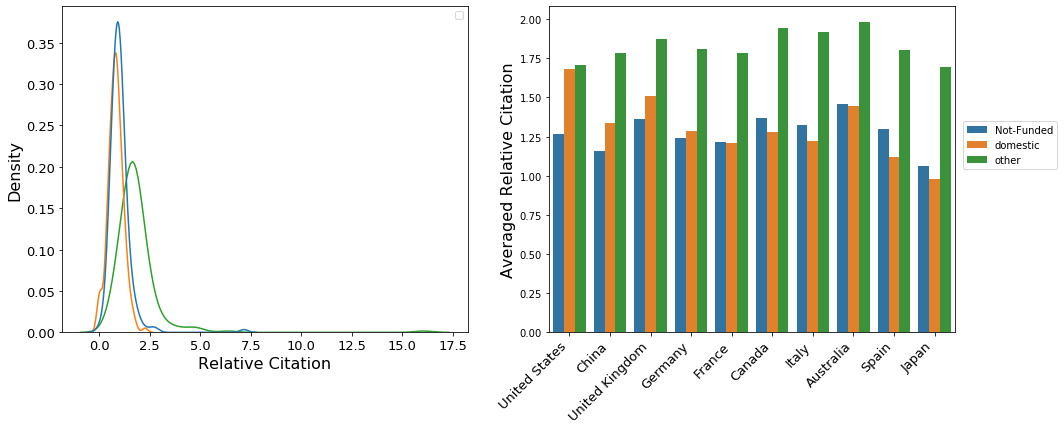

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.kdeplot(x='rel_citation',data=cntry_type,hue='fund_type',ax=ax[0],
           hue_order=['Not-Funded','domestic','other'])
ax[0].legend()
ax[0].set_xlabel("Relative Citation",fontsize=16)
ax[0].set_ylabel("Density",fontsize=16)
ax[0].tick_params(labelsize=13)

sns.barplot(x='author_country',y='rel_citation',hue='fund_type',data=cntry_top10,
           hue_order=['Not-Funded','domestic','other'],ax=ax[1])
plt.xticks(rotation="45",ha='right',fontsize=13)
ax[1].set_xlabel("")
ax[1].set_ylabel('Averaged Relative Citation',fontsize=16)
plt.legend(loc=[1.02,0.5])
plt.savefig("citation_fundtype.png",bbox_inches='tight')

In [20]:
cntry_type=cntry_type.pivot(index='author_country',columns='fund_type',values='rel_citation').reset_index()
cntry_type.head()

fund_type,author_country,Not-Funded,domestic,other
0,Afghanistan,1.629487,0.000000,4.793798
1,Albania,0.737792,0.700556,1.533879
2,Algeria,0.811302,0.824179,1.500110
3,Andorra,0.780636,0.640800,0.950400
4,Angola,0.605140,0.409250,1.518540


In [31]:


cntry_type[cntry_type.author_country=='United States']

,author_country,fund_type,rel_citation
555,United States,Not-Funded,1.263200
556,United States,domestic,1.679780
557,United States,other,1.708003
